# Import dataset from Kaggle


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rashikrahmanpritom/plant-disease-recognition-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'plant-disease-recognition-dataset' dataset.
Path to dataset files: /kaggle/input/plant-disease-recognition-dataset


# Check the relative paths and plot some images

In [17]:
import os

In [18]:
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

In [19]:
train_files_healthy = "/Train/Train/Healthy"
train_files_powdery = "/Train/Train/Powdery"
train_files_rust = "/Train/Train/Rust"

In [20]:
print("Number of healthy leaf images in training set", total_files(path + train_files_healthy))
print("Number of powder leaf images in training set", total_files(path + train_files_powdery))
print("Number of rusty leaf images in training set", total_files(path + train_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434


In [21]:
test_files_healthy = "/Test/Test/Healthy"
test_files_powdery = "/Test/Test/Powdery"
test_files_rust = "/Test/Test/Rust"

In [22]:
print("Number of healthy leaf images in test set", total_files(path + test_files_healthy))
print("Number of powder leaf images in test set", total_files(path + test_files_powdery))
print("Number of rusty leaf images in test set", total_files(path + test_files_rust))

Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50


In [23]:
valid_files_healthy = "/Validation/Validation/Healthy"
valid_files_powdery = "/Validation/Validation/Powdery"
valid_files_rust = "/Validation/Validation/Rust"

In [24]:
print("Number of healthy leaf images in validation set", total_files(path + valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(path + valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(path + valid_files_rust))

Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


In [25]:
from PIL import Image
import IPython.display as display

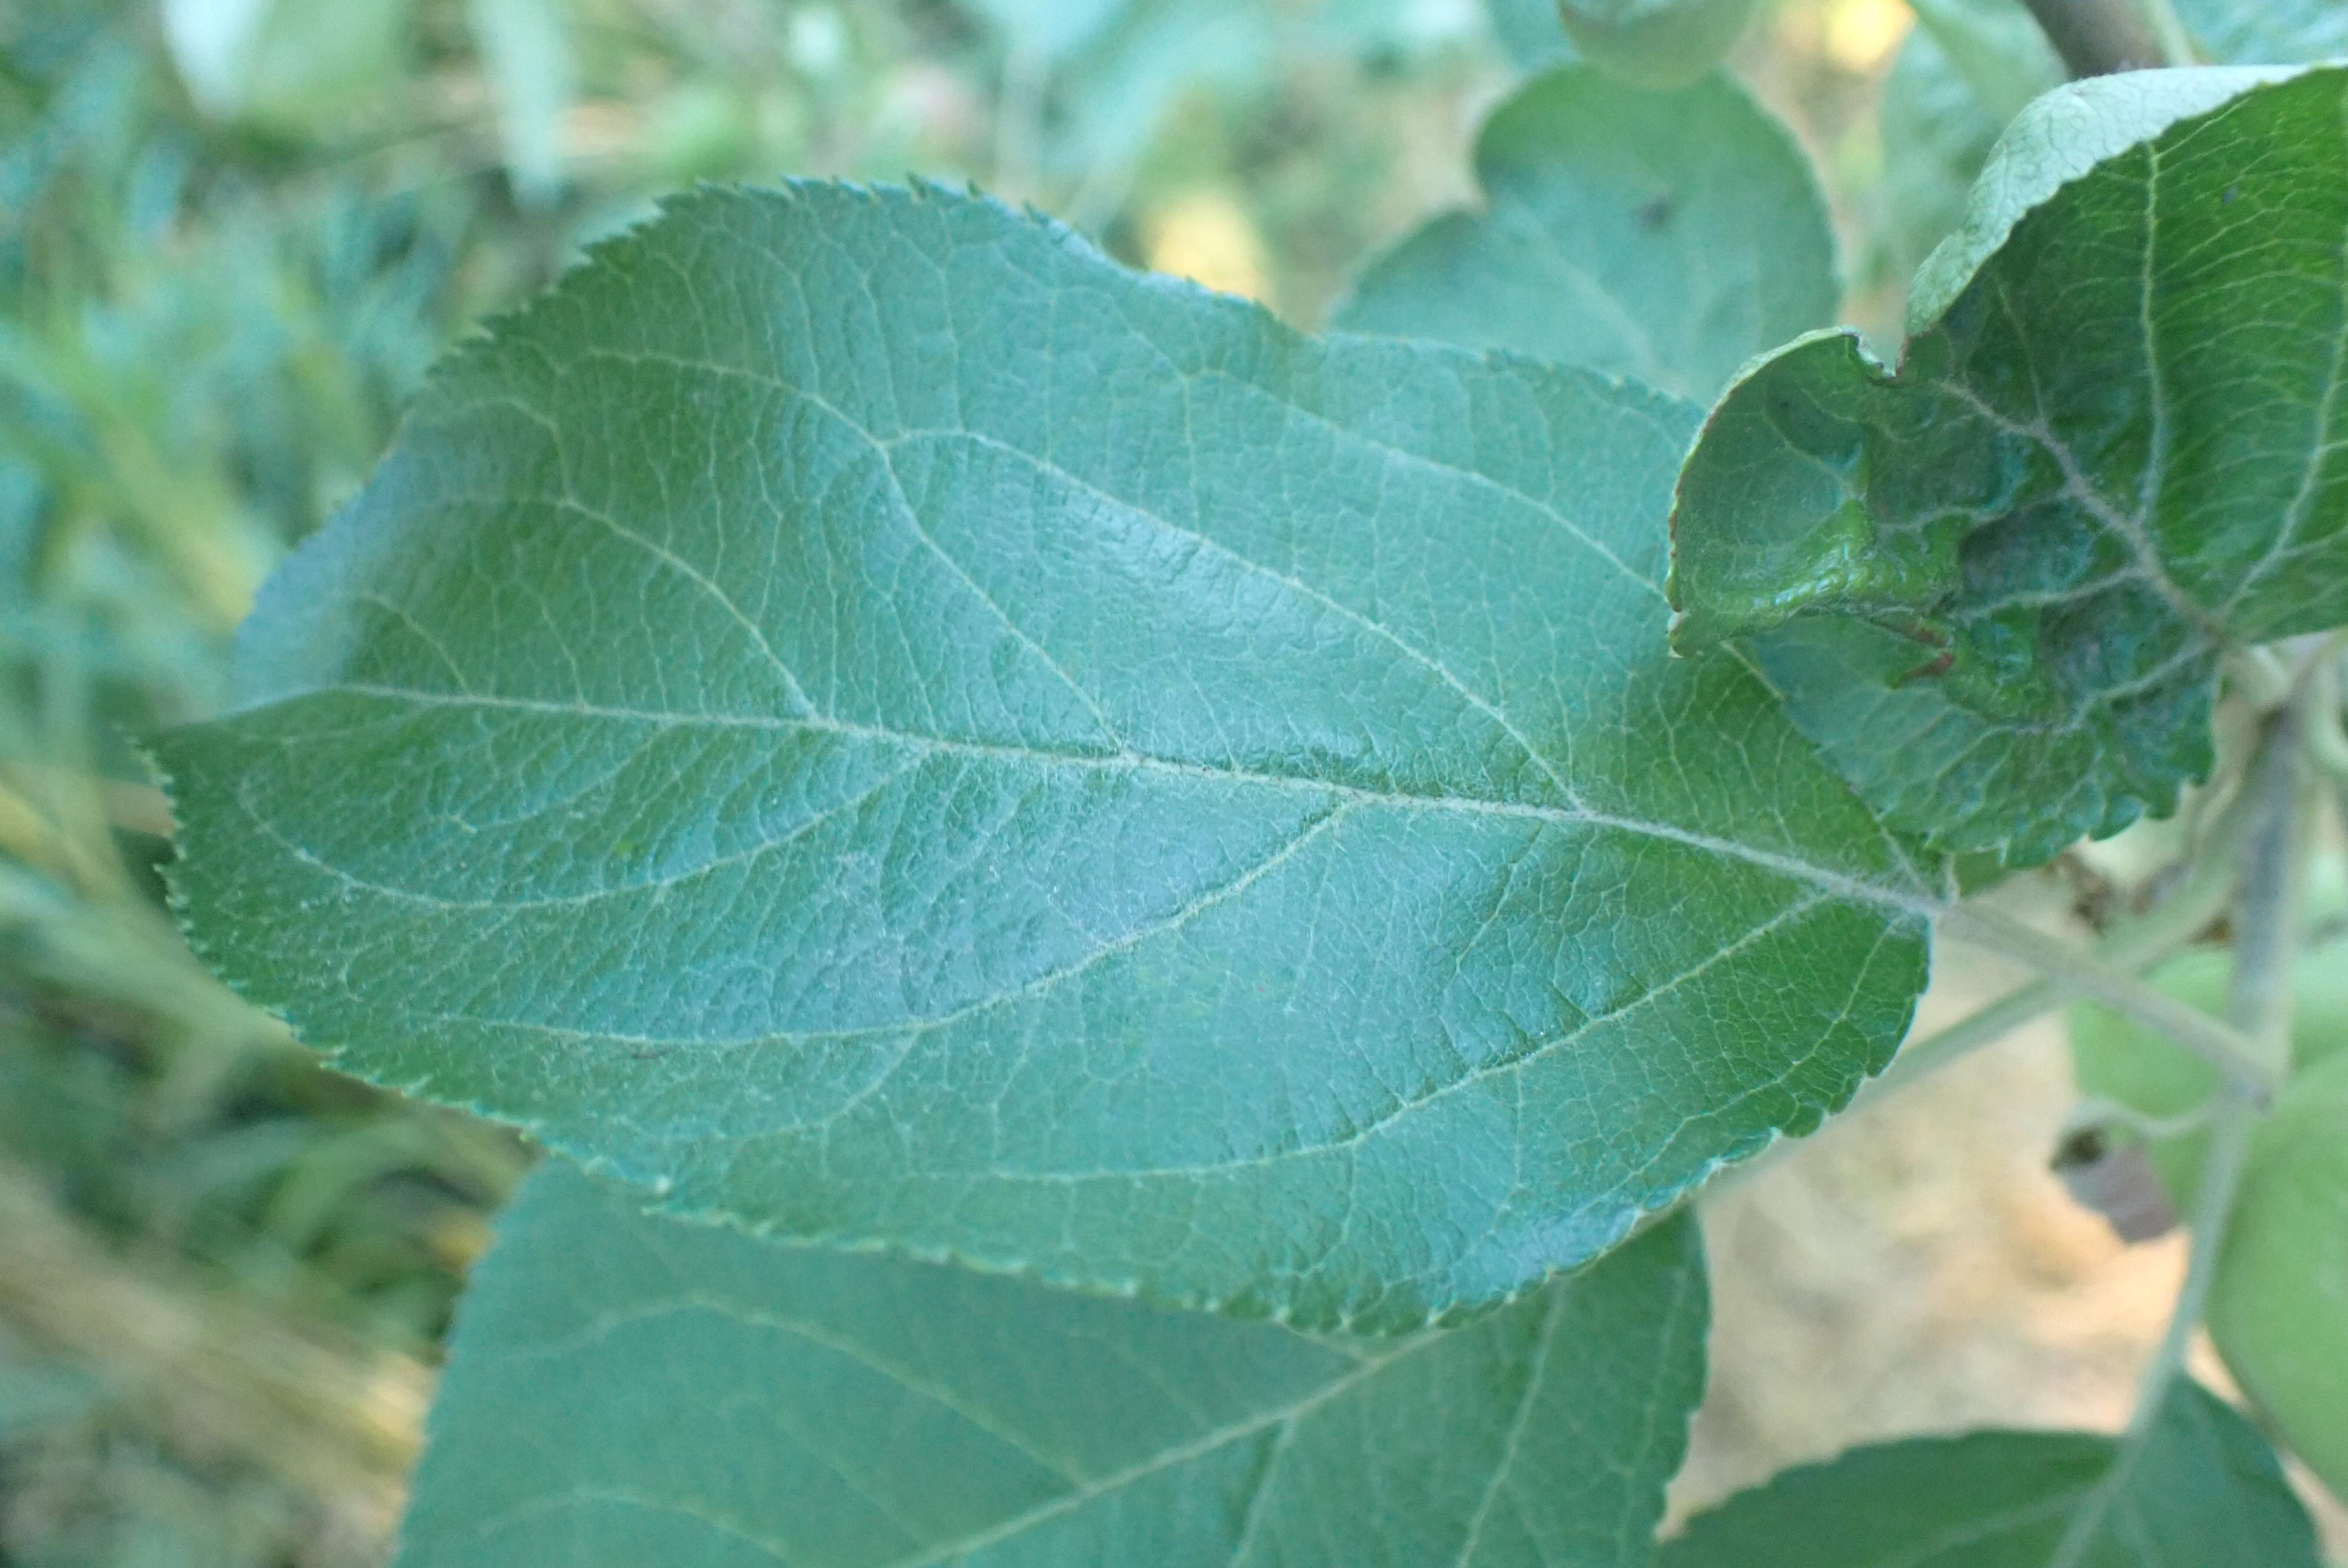

In [26]:
image_path = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

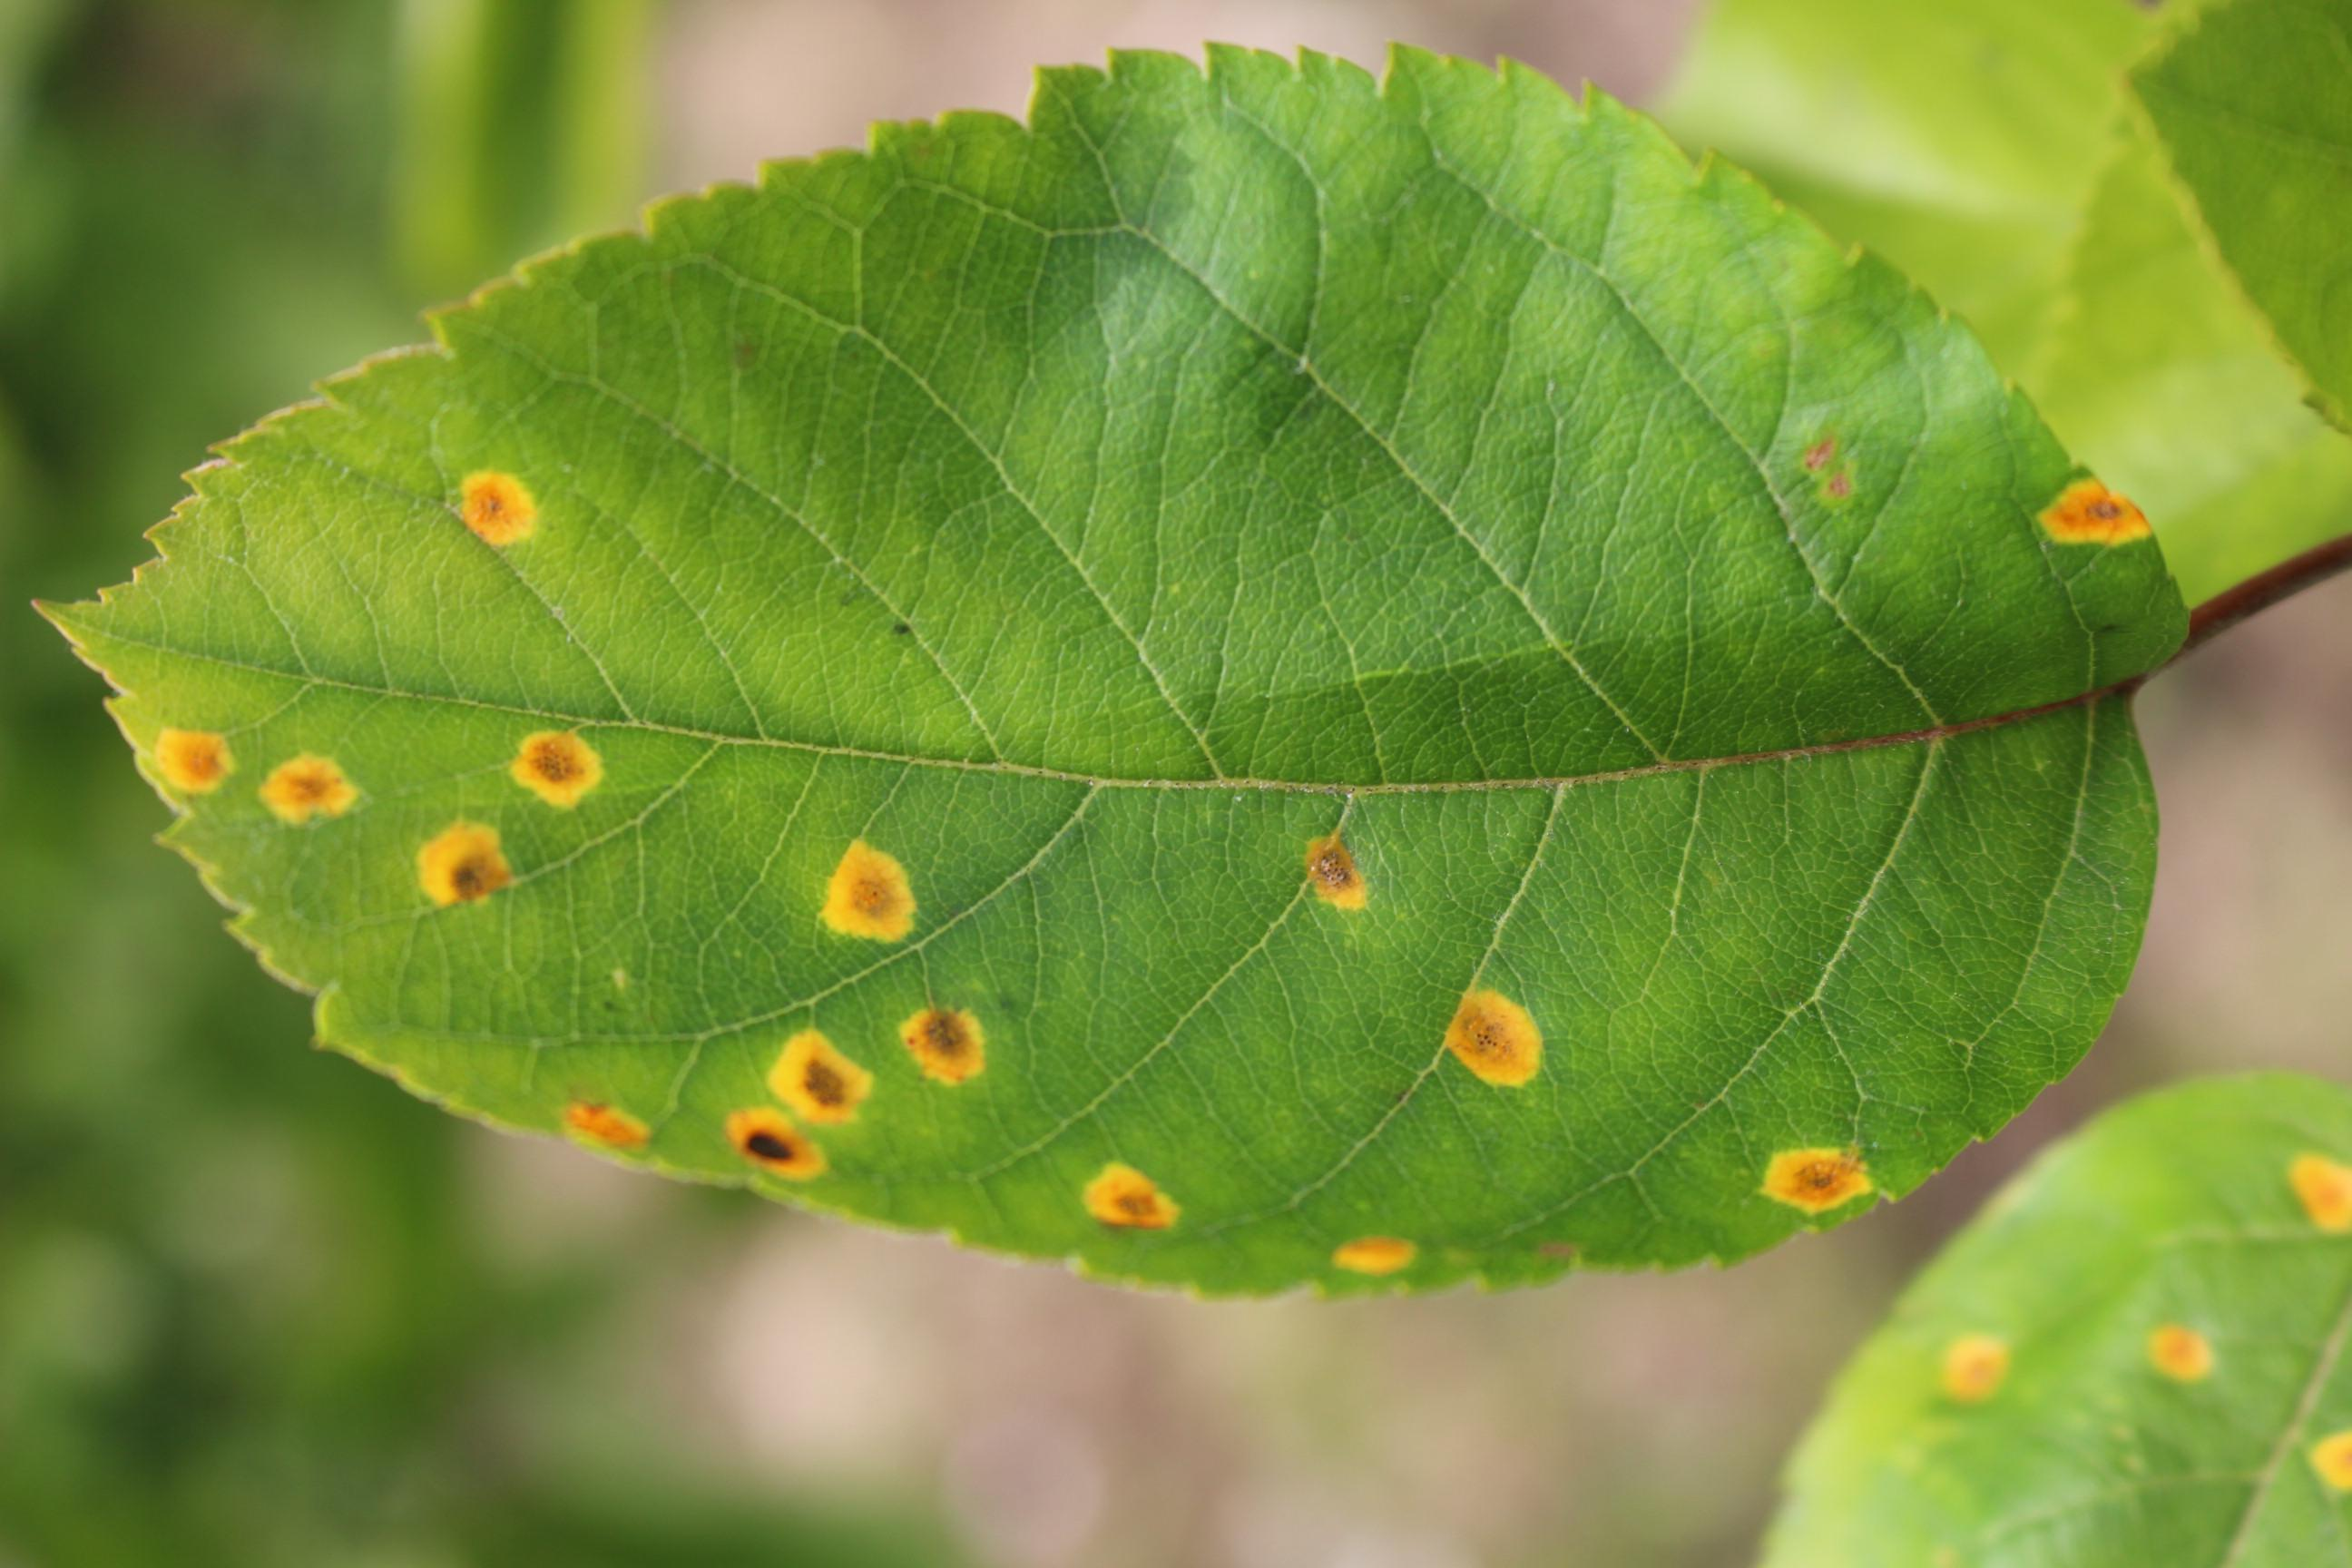

In [27]:
image_path = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/Rust/80f09587dfc7988e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

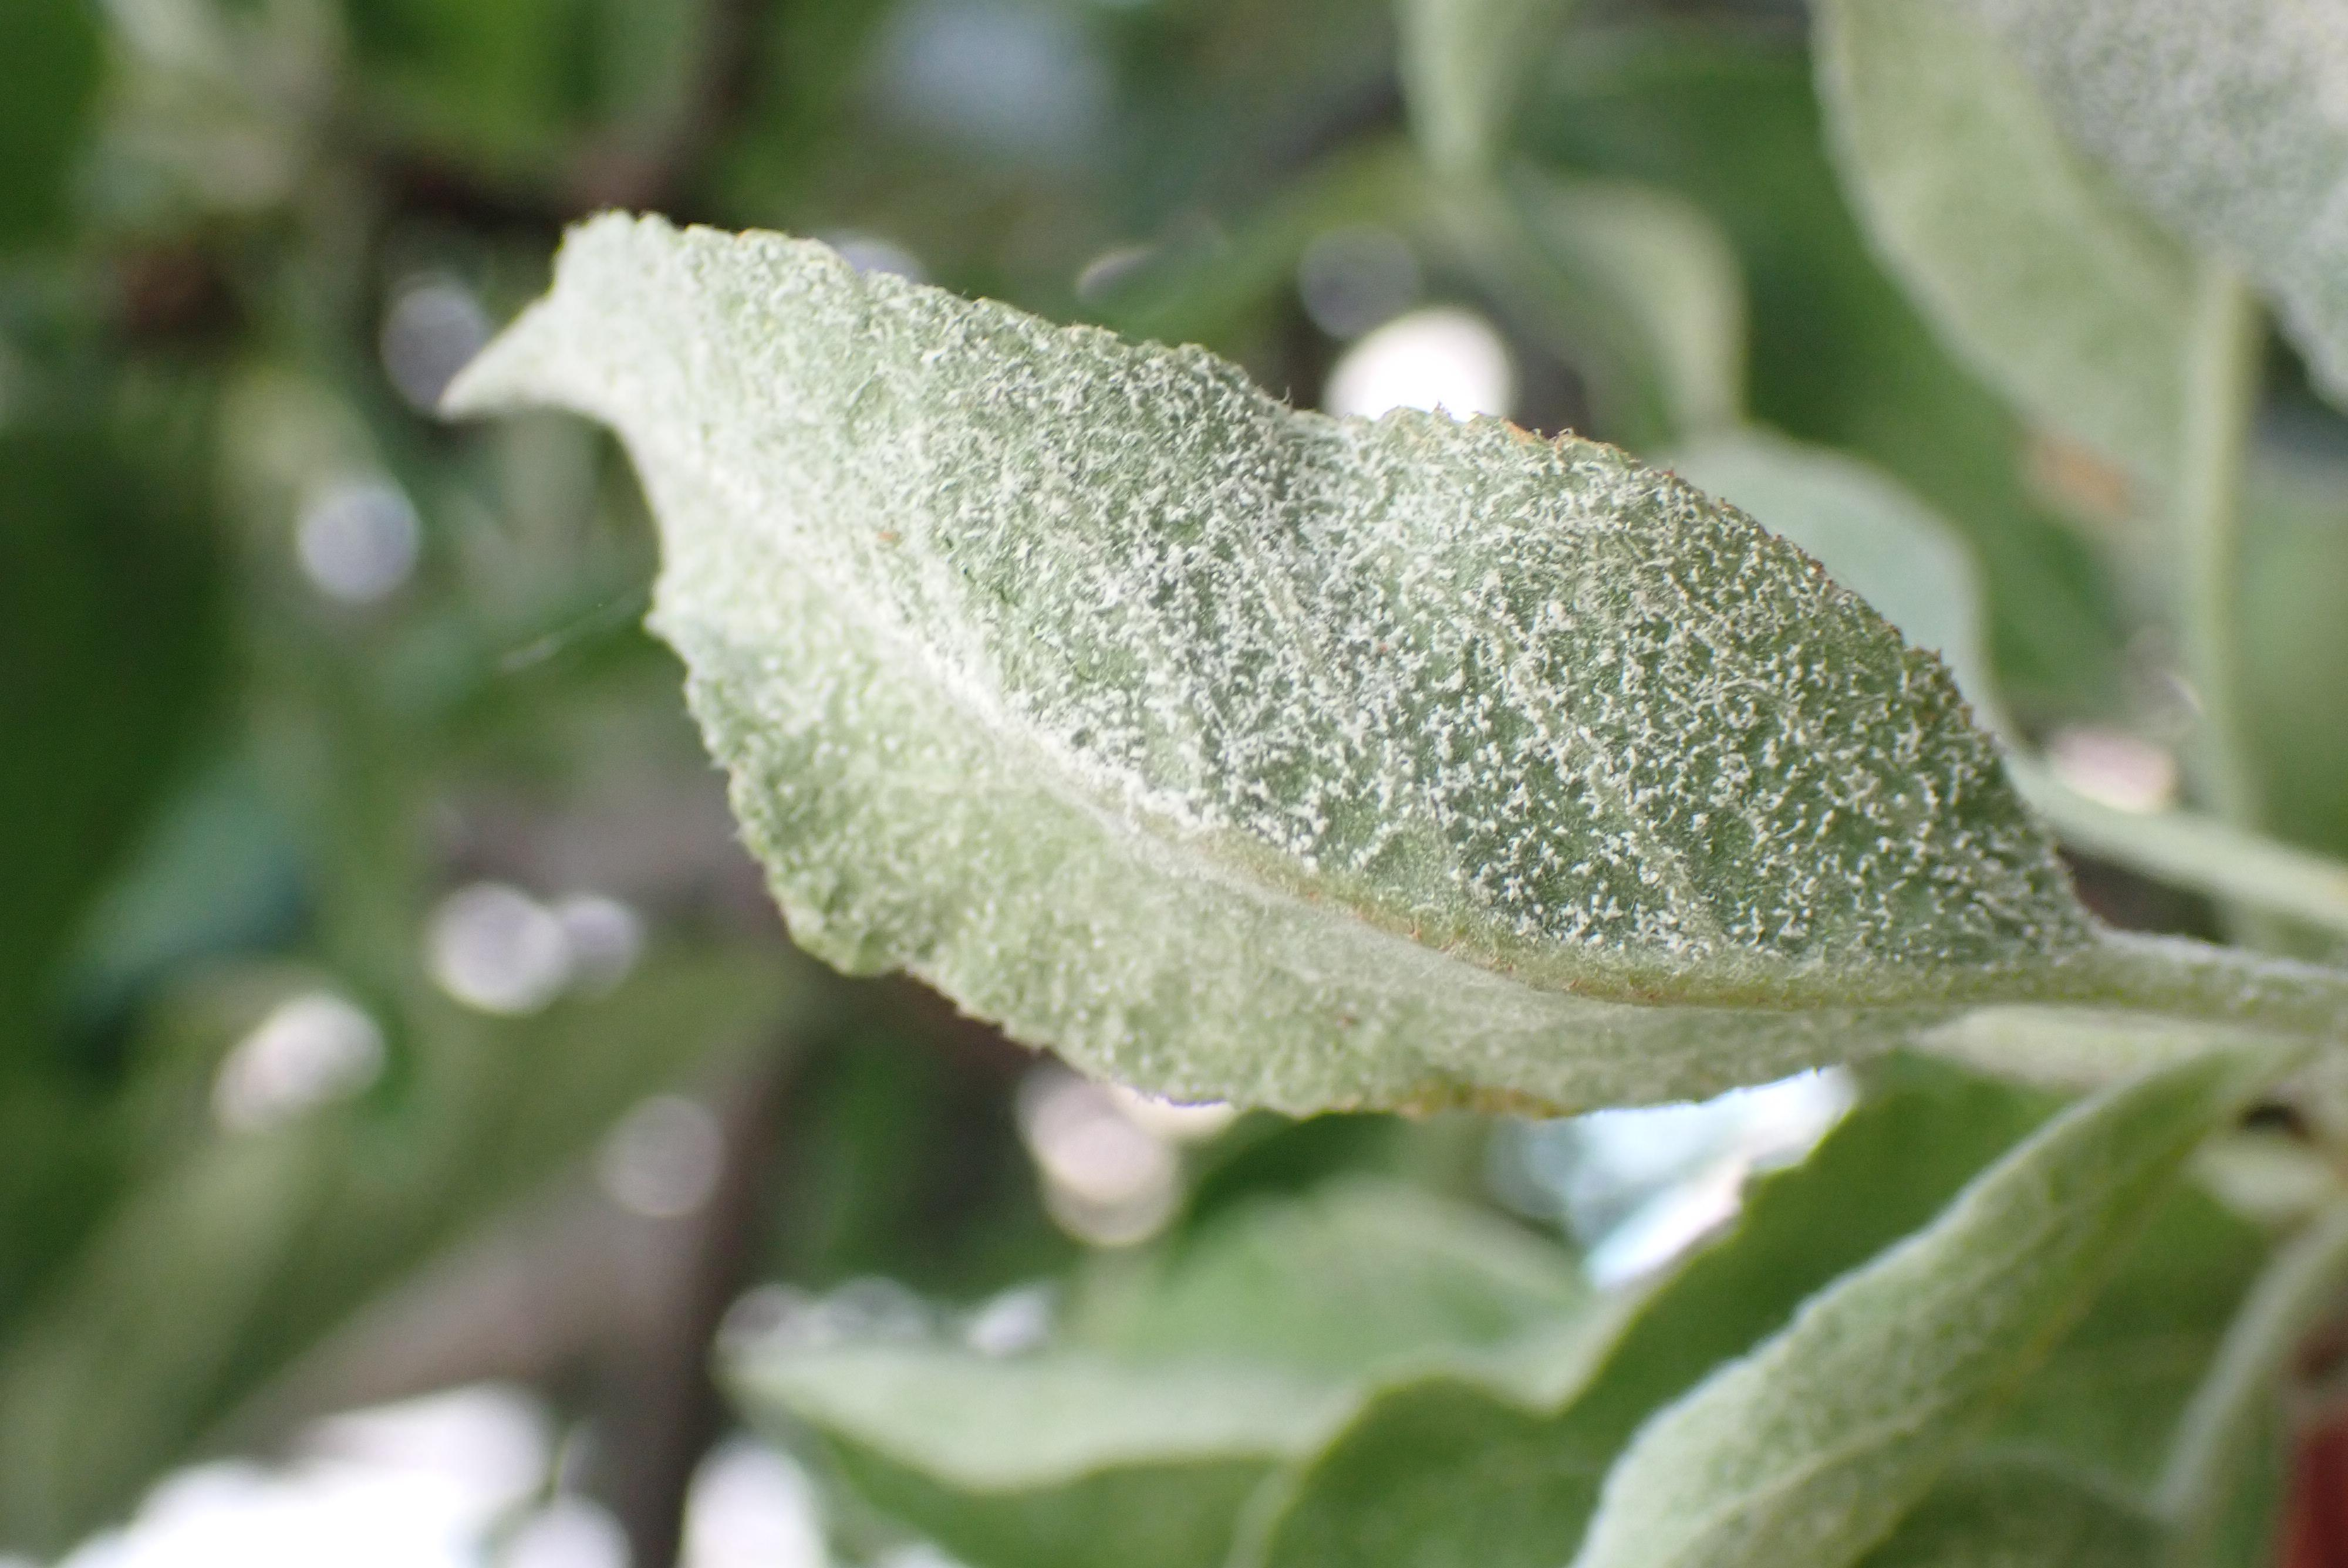

In [28]:
image_path = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/Powdery/802f7439ec1ef0cd.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

#Define and train the model

In [29]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Deprecated

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
path_train = '/kaggle/input/plant-disease-recognition-dataset/Train/Train'
path_validation = '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation'

train_generator = train_datagen.flow_from_directory(path_train,
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(path_validation,
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax')) #3 classes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_batch_size=16,
                    callbacks=[callbacks]
                    )

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3931 - loss: 2.0268 - val_accuracy: 0.5167 - val_loss: 0.9327
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7437 - loss: 0.6221 - val_accuracy: 0.7500 - val_loss: 0.6512
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8070 - loss: 0.4409 - val_accuracy: 0.8000 - val_loss: 0.4930
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8671 - loss: 0.3477 - val_accuracy: 0.8000 - val_loss: 0.4771
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9332 - loss: 0.2113 - val_accuracy: 0.7667 - val_loss: 0.5820
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9252 - loss: 0.2459 - val_accuracy: 0.8333 - val_loss: 0.3666
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9321 - loss: 0.2152 - val_accuracy: 0.8833 - val_loss: 0.2556
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9313 - loss: 0.2184 - val_accuracy: 0.8667 - val_loss:

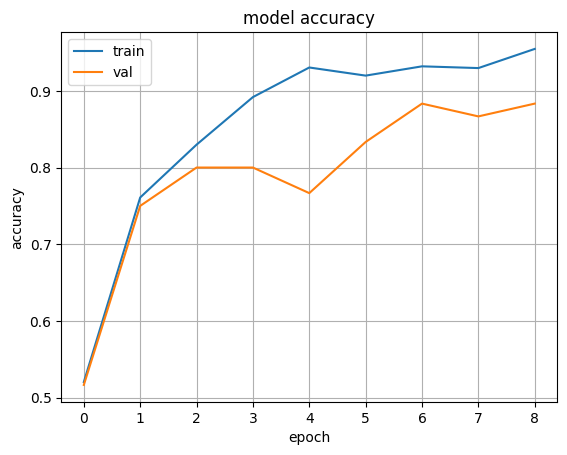

In [44]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid()
plt.show()

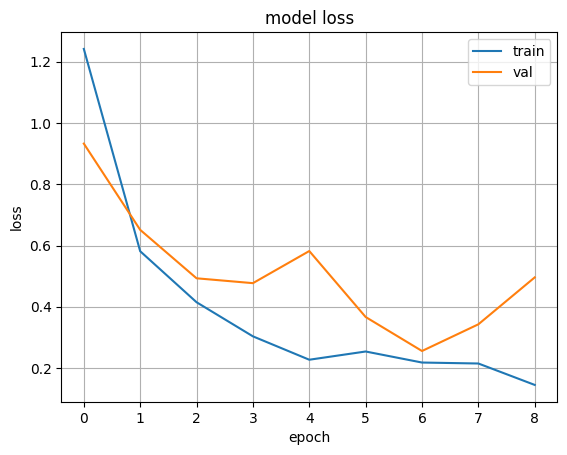

In [45]:
plt.figure()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid()
plt.show()

# Save the model

In [50]:
# model.save("model.keras")
model.save("model.h5")

# Try the trained model

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

path_x = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/Rust/830f26cc6d3cd13e.jpg'
x = preprocess_image(path_x)

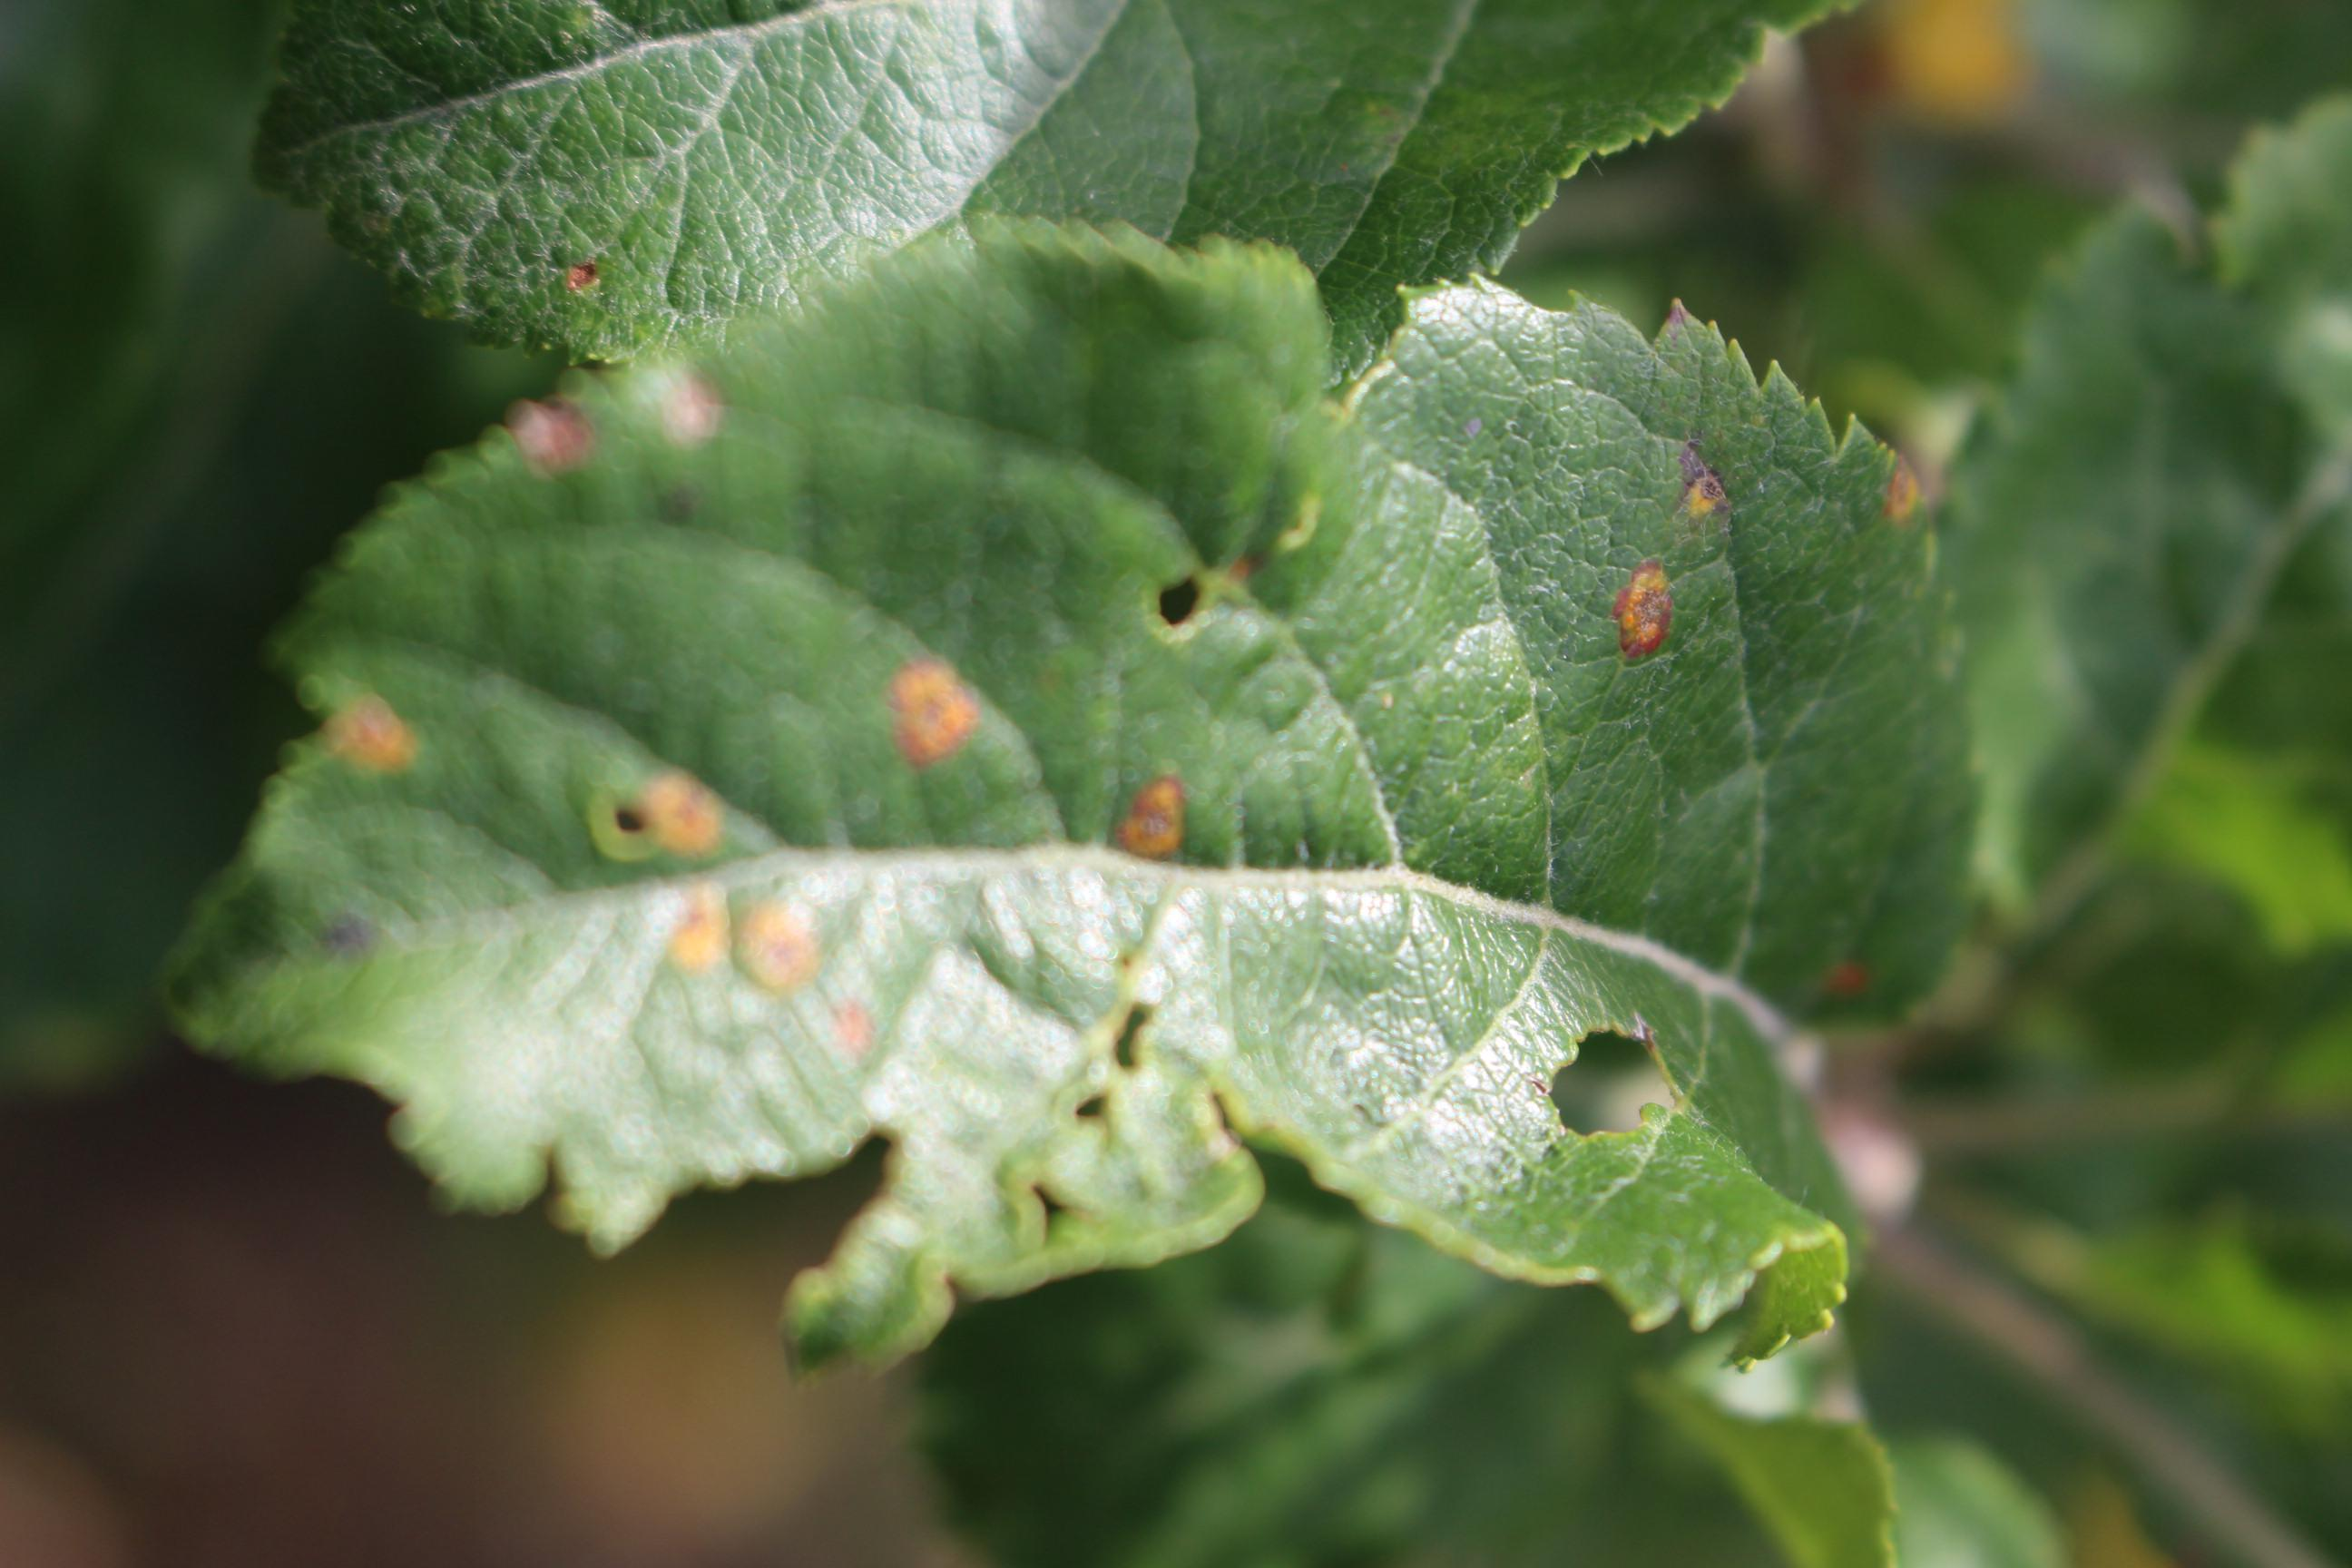

In [ ]:
with open(path_x, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([0.1329437 , 0.63782454, 0.22923176], dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [ ]:
{v: k for k, v in labels.items()}

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Powdery


# Check how it performs using the suite of test images

In [46]:
path_test = '/kaggle/input/plant-disease-recognition-dataset/Test/Test'

test_generator = test_datagen.flow_from_directory(path_test,
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 150 images belonging to 3 classes.


In [47]:
images_test, labels_test = next(test_generator)

In [48]:
test_loss, test_accuracy = model.evaluate(images_test, labels_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8438 - loss: 0.3475
